In [10]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn import datasets
from sklearn import svm
import spacy
import nltk

In [17]:
data = pd.read_csv("FinalBalancedDataset.csv")
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [25]:
nlp = spacy.load('en_core_web_sm')

stopwords = ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [30]:
nltk.download('wordnet')
data['text'] = data['tweet'].apply(clean)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SVR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
data.to_csv('tweets_after_nlp.csv', index=False)


In [3]:
data = pd.read_csv("tweets_after_nlp.csv")
data.drop('tweet',axis=1,inplace=True)
data.dropna(inplace=True)
data

,Toxicity,text
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit ca nt use cause n...
2,0,majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation
...,...,...
56740,1,s muthafin lie lifeasking pearls coreyemanuel ...
56741,1,ve gone broke wrong heart baby drove redneck c...
56742,1,young buck wanna eat dat nigguh like ai nt fuc...
56743,1,youu got wild bitches tellin lies


In [4]:
def run_model(model,X_train,y_train,X_test,y_test,model_type = 1):
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
  print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

  print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

  cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  plt.show()

  if model_type == 1:

    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [5]:
docs = list(data['text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 1000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [6]:
X = docs
y = data['Toxicity']

SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45376, 1000) (45376,)
(11345, 1000) (11345,)



Training Accuracy score: 0.7499118476727785
Testing Accuracy score: 0.7416483032172764
              precision    recall  f1-score   support

not relevant       0.94      0.59      0.72      6514
    relevant       0.63      0.94      0.76      4831

    accuracy                           0.74     11345
   macro avg       0.78      0.77      0.74     11345
weighted avg       0.81      0.74      0.74     11345



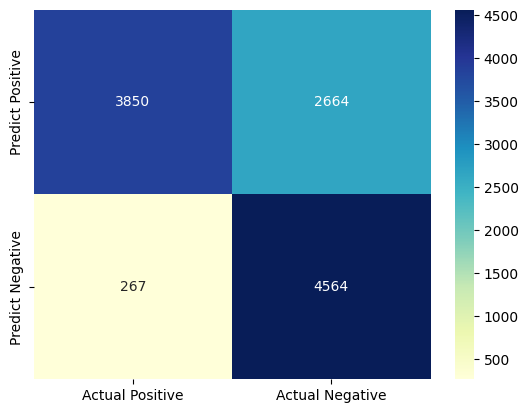

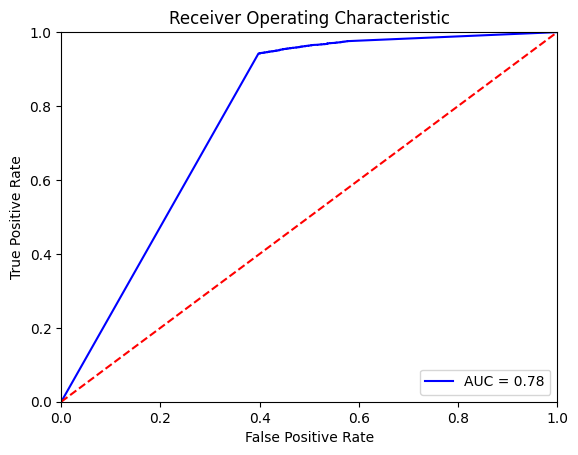

In [7]:
# Gaussian NB
model_gnb = GaussianNB()
run_model(model_gnb,X_train,y_train,X_test,y_test)



Training Accuracy score: 0.9862702750352609
Testing Accuracy score: 0.9105332745702953
              precision    recall  f1-score   support

not relevant       0.91      0.94      0.92      6514
    relevant       0.91      0.88      0.89      4831

    accuracy                           0.91     11345
   macro avg       0.91      0.91      0.91     11345
weighted avg       0.91      0.91      0.91     11345



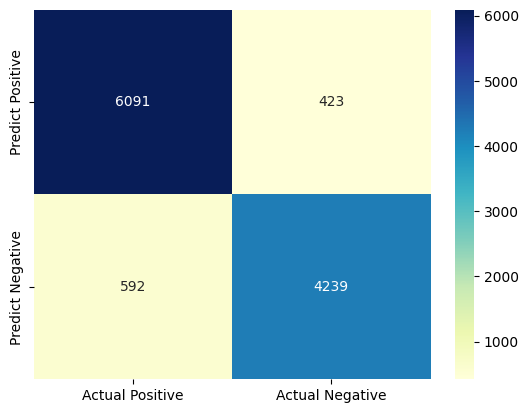

In [8]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=SEED)
run_model(model_dt,X_train,y_train,X_test,y_test,2)


Training Accuracy score: 0.9860719322990127
Testing Accuracy score: 0.9261348611723226
              precision    recall  f1-score   support

not relevant       0.92      0.95      0.94      6514
    relevant       0.93      0.89      0.91      4831

    accuracy                           0.93     11345
   macro avg       0.93      0.92      0.92     11345
weighted avg       0.93      0.93      0.93     11345



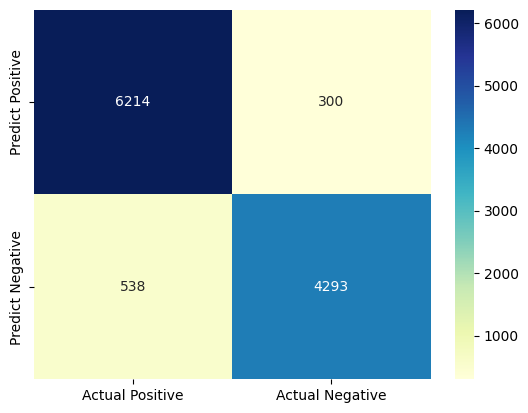

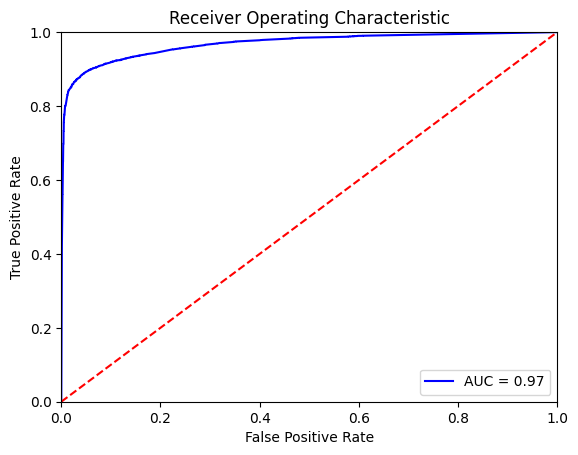

In [11]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=50)
run_model(model_rf,X_train,y_train,X_test,y_test,1)


Training Accuracy score: 0.8966413963328632
Testing Accuracy score: 0.8292639929484354
              precision    recall  f1-score   support

not relevant       0.81      0.92      0.86      6514
    relevant       0.86      0.71      0.78      4831

    accuracy                           0.83     11345
   macro avg       0.84      0.81      0.82     11345
weighted avg       0.83      0.83      0.83     11345



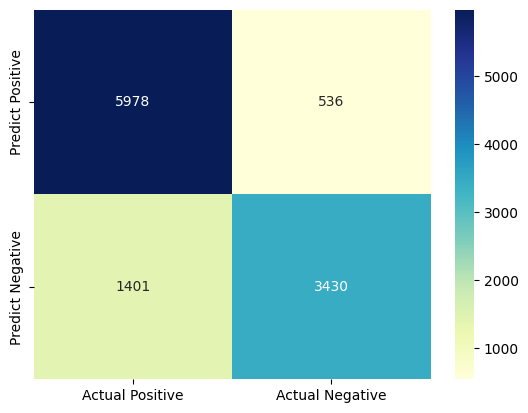

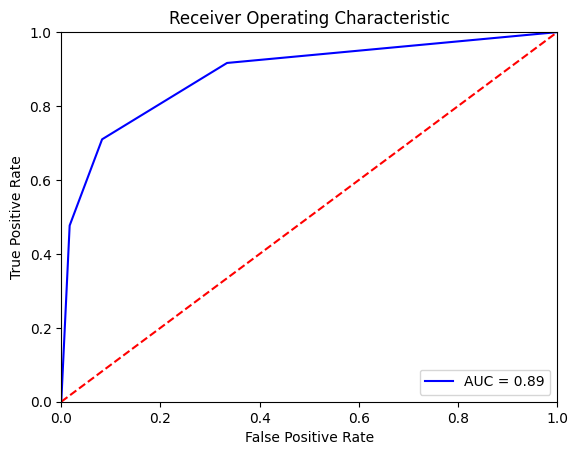

In [12]:
#KNN

model_knn = KNeighborsClassifier(n_neighbors=3)
run_model(model_knn,X_train,y_train,X_test,y_test)


Training Accuracy score: 0.9310869181946403
Testing Accuracy score: 0.9262230057293962
              precision    recall  f1-score   support

not relevant       0.91      0.96      0.94      6514
    relevant       0.94      0.88      0.91      4831

    accuracy                           0.93     11345
   macro avg       0.93      0.92      0.92     11345
weighted avg       0.93      0.93      0.93     11345



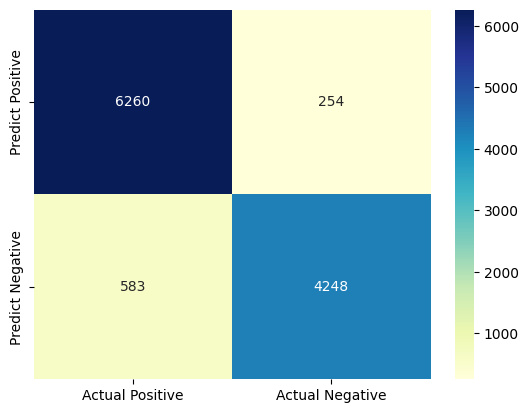

In [13]:
# Linear SVM
model_svc = LinearSVC(class_weight='balanced')
run_model(model_svc,X_train,y_train,X_test,y_test,2)
